## DS3200 Practicum 3: Model Development & Tuning
By: Bella Chin, Michael Mendes, Nasir Stanley


##Question 1 — The DS Problem (0 point)

In your own words, formulate the Data Science problem.

The Data Science problem for this practicum is to explore and gather information about the relationship between lifestyle and diabetic outcomes for patients in the USA. The goal is to identify patterns and contributing factors such as age, location, race, and other social determinants of health that influence diabetes prevalence. Using the CDC Diabetes Health Indicators dataset from the BRFSS, the analysis will focus on understanding these factors while acknowledging the limitations of the dataset and the broader context of diabetes risk and management.

##Question 2 — Prepare the Data (5 pts)

*   Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
*   Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis.



In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# check if imported correctly
print(df.head())

 # evaluate dataset to determine if variables expected data type
print(df.dtypes)

# convert variables to suitable data types
df['Diabetes_012'] = df['Diabetes_012'].astype('category')
df['HighBP'] = df['HighBP'].astype('category')
df['HighChol'] = df['HighChol'].astype('category')
df['CholCheck'] = df['CholCheck'].astype('category')
df['Smoker'] = df['Smoker'].astype('category')
df['Stroke'] = df['Stroke'].astype('category')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('category')
df['PhysActivity'] = df['PhysActivity'].astype('category')
df['Fruits'] = df['Fruits'].astype('category')
df['Veggies'] = df['Veggies'].astype('category')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('category')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('category')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('category')
df['GenHlth'] = df['GenHlth'].astype('category')
df['MentHlth'] = df['MentHlth'].astype('int64')
df['PhysHlth'] = df['PhysHlth'].astype('int64')
df['DiffWalk'] = df['DiffWalk'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Income'] = df['Income'].astype('category')

# check if converted correctly
print(df.dtypes)

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [3]:
# check the number of missing values in each column
print(df.isnull().sum())

# seeing the percentage of missing values in each column
print(df.isnull().mean()*100)

# seeing how many missing values there can be in a single row at any time
# since we see there is no missing values we don't remove anything from the dataset
print(df.isnull().sum(axis=1).sort_values(ascending=False))

# check the number of invalid values
print(df.isna().sum())

# make sure no invalid numerical values
df = df[(df['MentHlth']>= 1) & (df['MentHlth']<= 30)]
df = df[(df['PhysHlth']>= 1) & (df['PhysHlth']<= 30)]

# check the categories of variables to make sure it aligns with the data dictionary
for col in df.select_dtypes(include=['category']):
    print(col, df[col].unique())

# check statistical summary for any negative values
print(df.describe())
print(df.head())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                

In [4]:
# check the number of outliers
print(df.describe())

# get numeric columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# compute the IQR
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# apply IQR filter
outliers = (numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))

# handle outliers
clean_df = df[~outliers.any(axis=1)]

# check if outliers are handled
print(clean_df.describe())

                BMI      MentHlth      PhysHlth
count  43933.000000  43933.000000  43933.000000
mean      29.786174     12.172513     12.814854
std        7.791892     10.780277     11.325985
min       12.000000      1.000000      1.000000
25%       24.000000      3.000000      3.000000
50%       28.000000      7.000000      7.000000
75%       33.000000     20.000000     25.000000
max       98.000000     30.000000     30.000000
                BMI      MentHlth      PhysHlth
count  42454.000000  42454.000000  42454.000000
mean      28.933010     12.069134     12.674471
std        6.192382     10.753399     11.296005
min       12.000000      1.000000      1.000000
25%       24.000000      3.000000      3.000000
50%       28.000000      7.000000      7.000000
75%       33.000000     20.000000     25.000000
max       46.000000     30.000000     30.000000


For the data preparation steps, I checked if there were any missing values in the columns and rows of the dataset. It showed there were no msising values so I did not remove anything. Next, I made sure each numerical variables had no invalid values according to the information provided by the data dictionary. I also checked the unique values for each variable with the information from the data dictionary and looked at the summary statistics. Since it matched the data dictionary information and there were no negative values, I did not alter the categorical variables since there were no invalid values. However, for BMI I did not adjust invalid numbers since information online did not indicate a certain range that BMI fell under. For the outliers, I identified the outliers using the IQR method where values outside the range of 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3) were considered outliers. I then removed any rows from the DataFrame that contained outliers in any numeric column, resulting in a cleaned DataFrame with outliers handled.

##Question 3 — (20 points)

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and social determinants of health in the dataset, and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results.

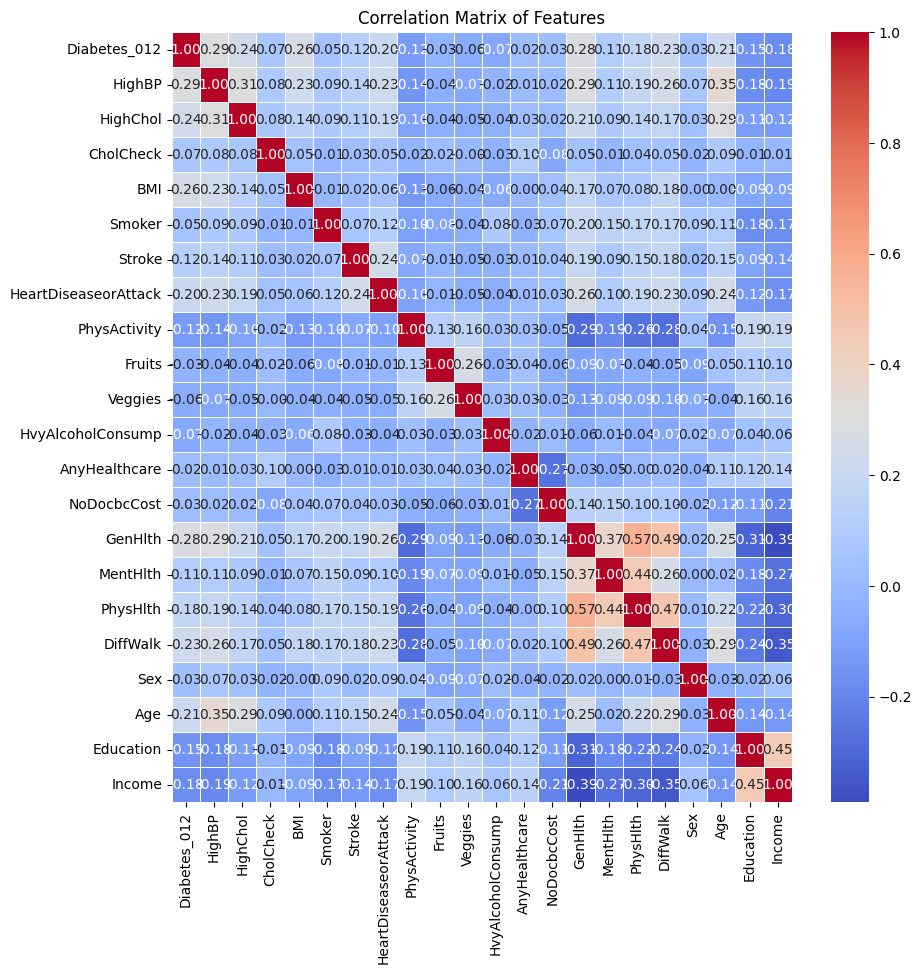

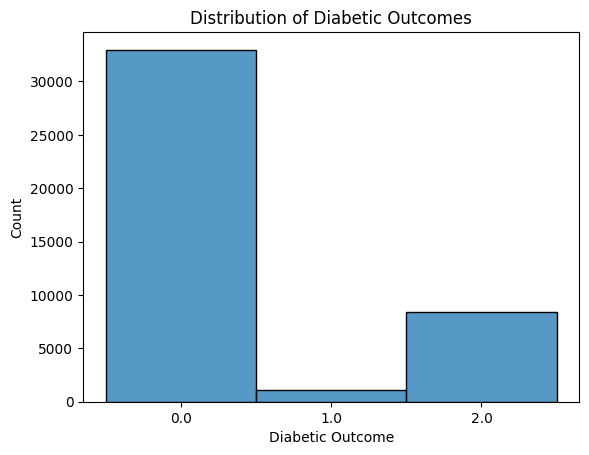

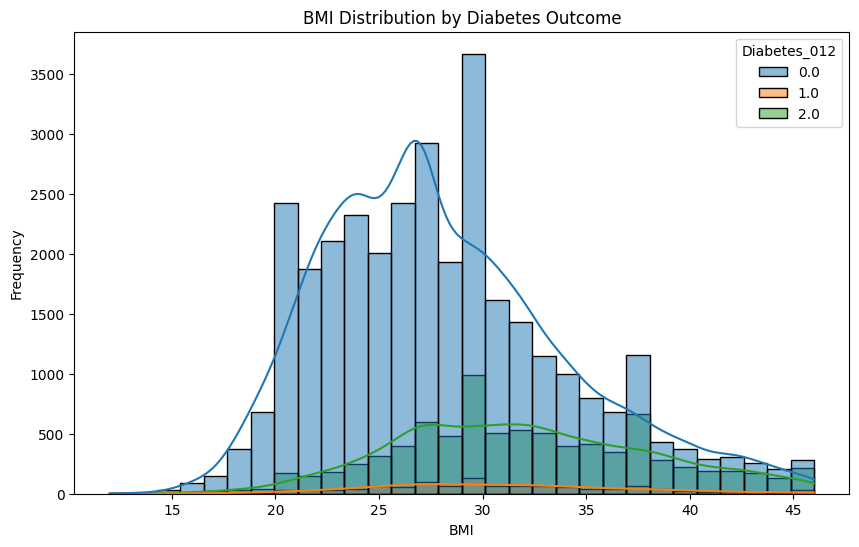

<ipython-input-5-f1d938c0c576>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([num, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


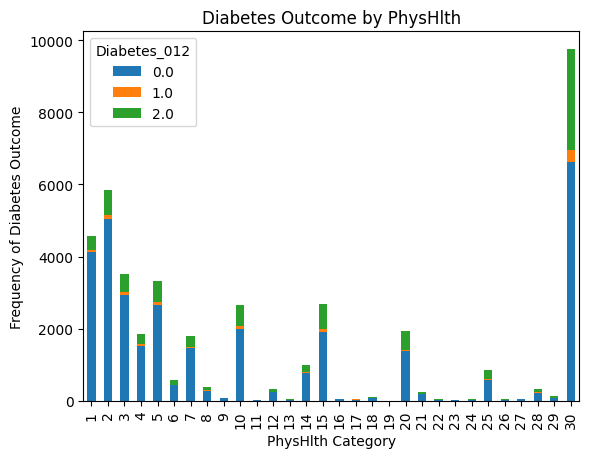

<ipython-input-5-f1d938c0c576>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([num, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


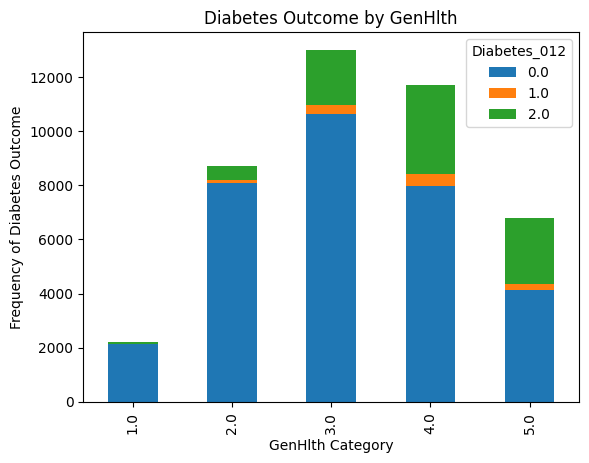

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

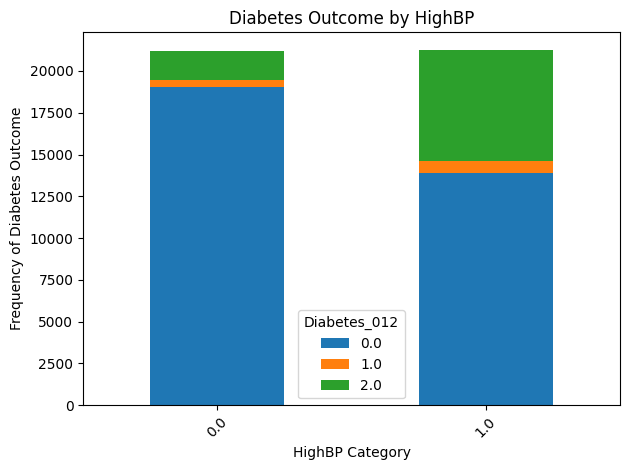

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

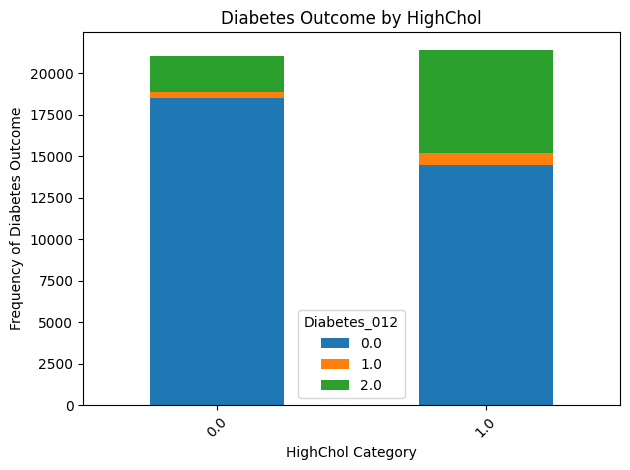

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

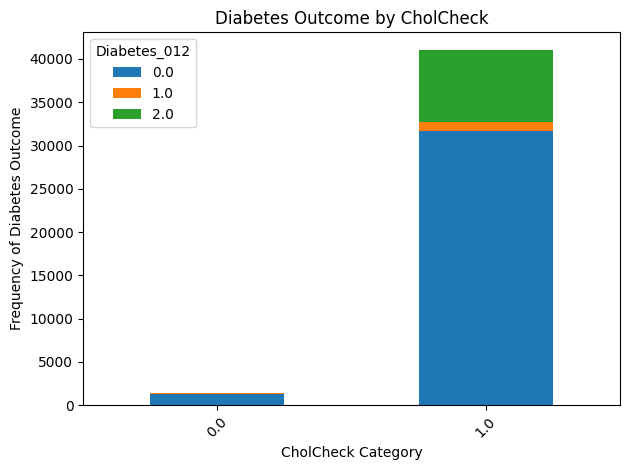

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

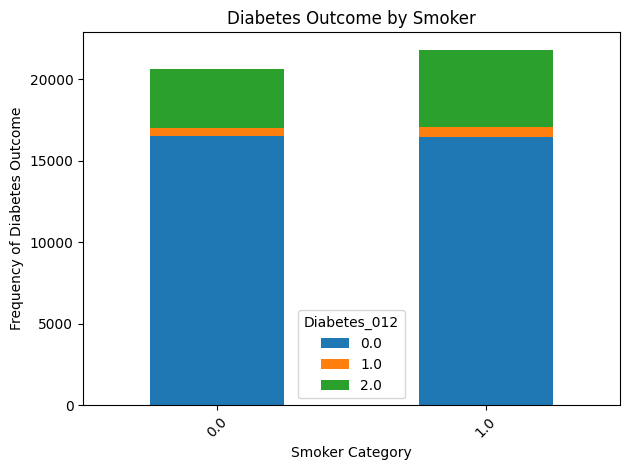

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

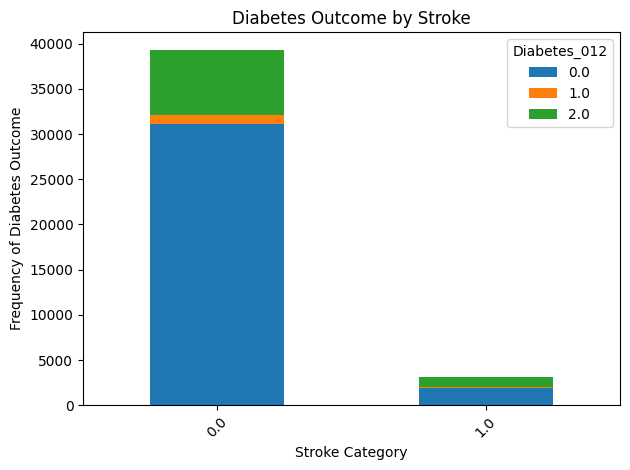

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

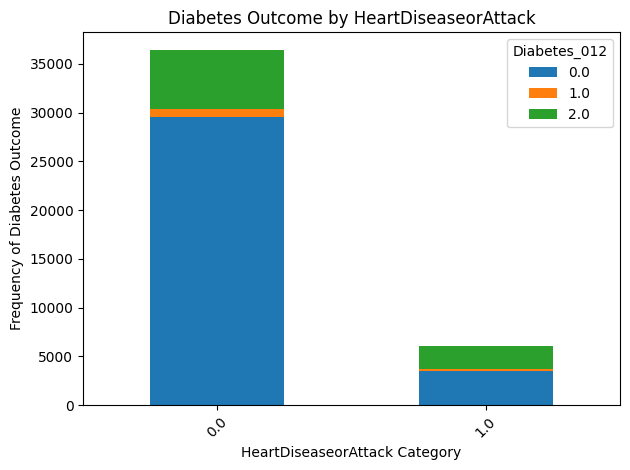

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

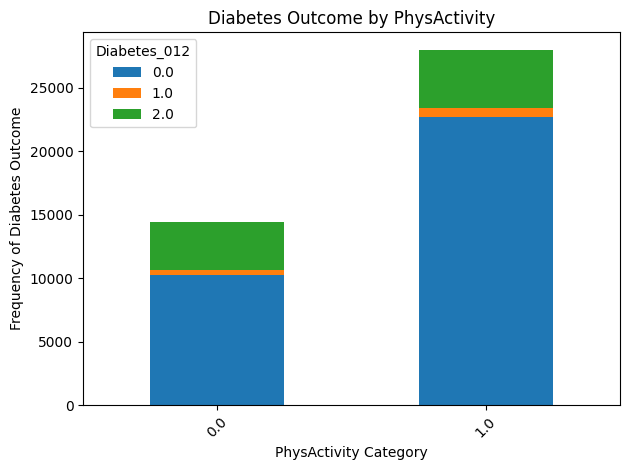

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

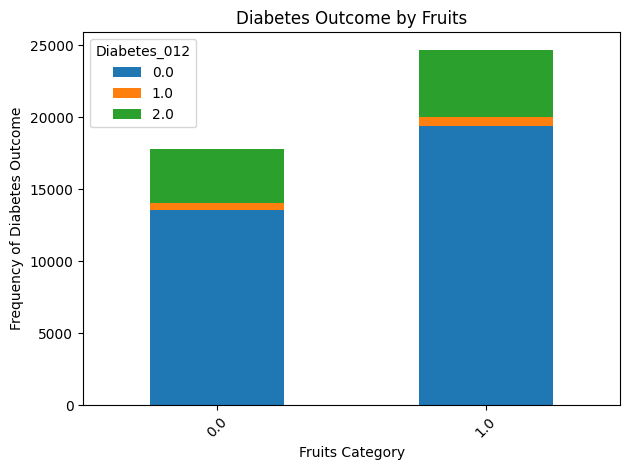

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

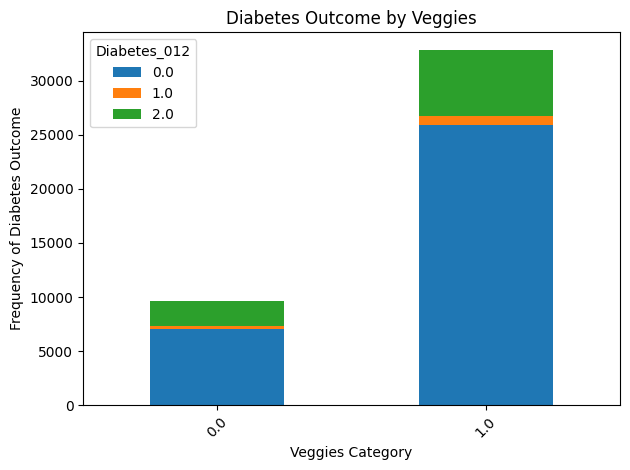

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

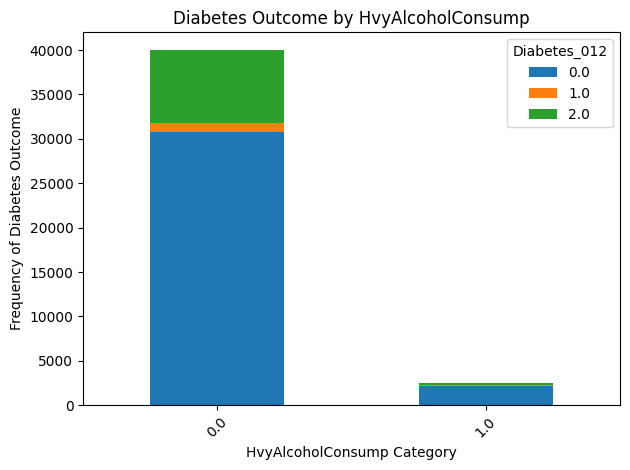

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

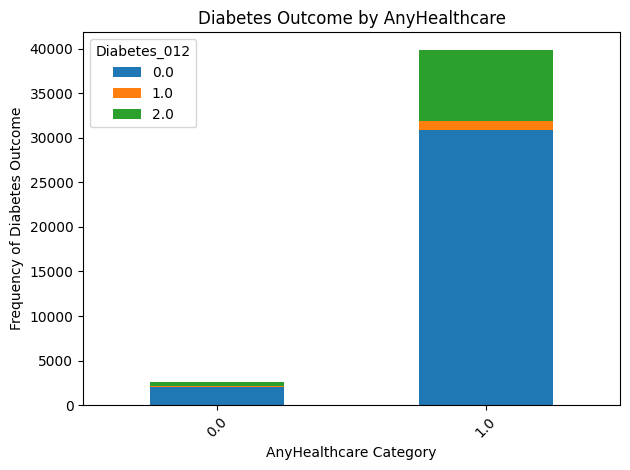

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

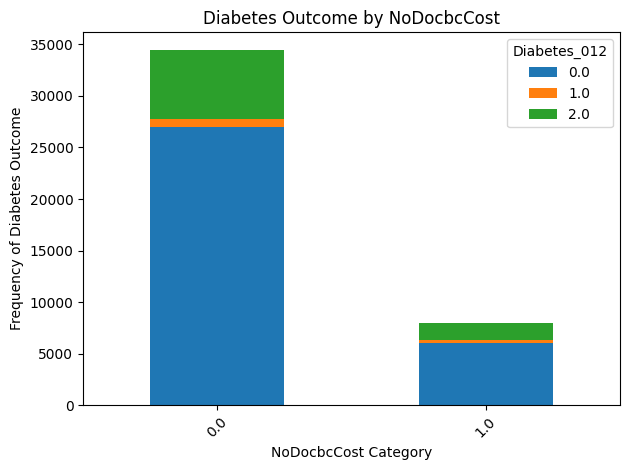

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

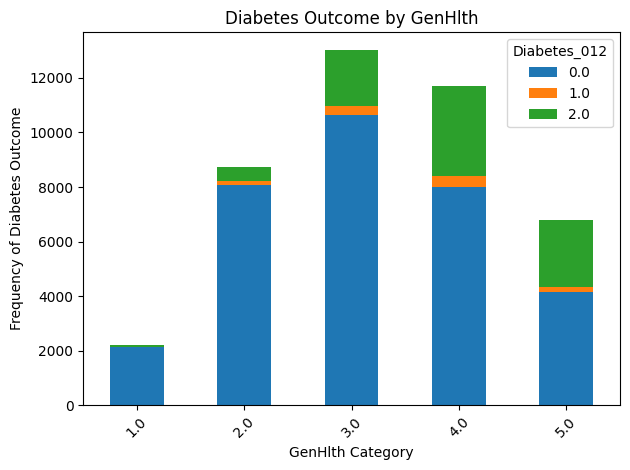

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

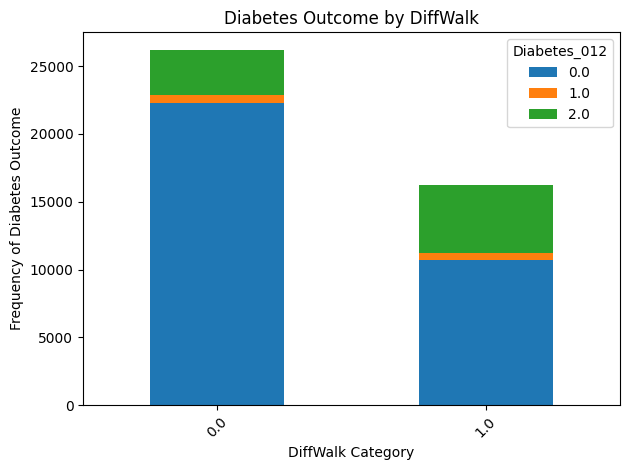

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

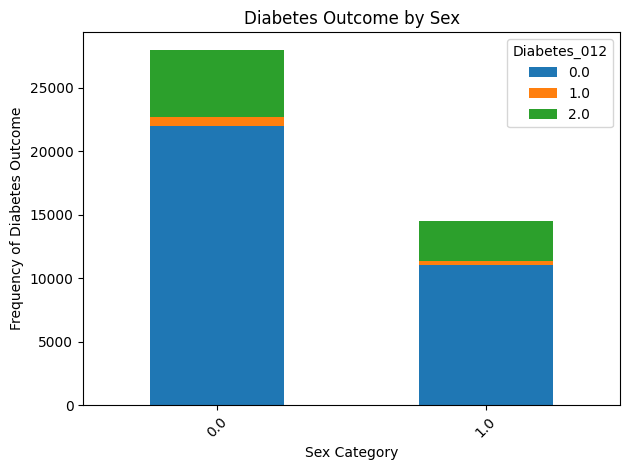

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

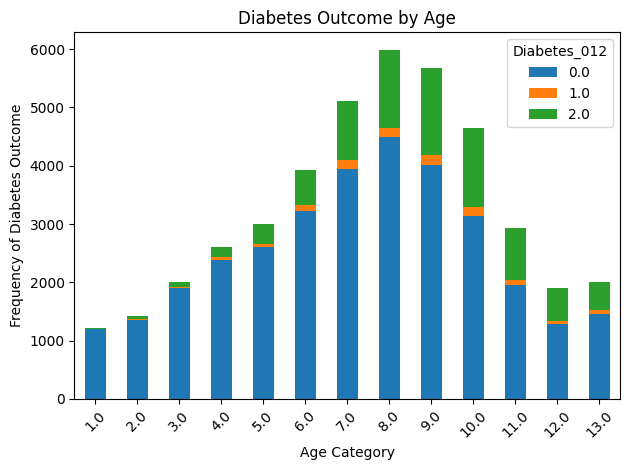

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

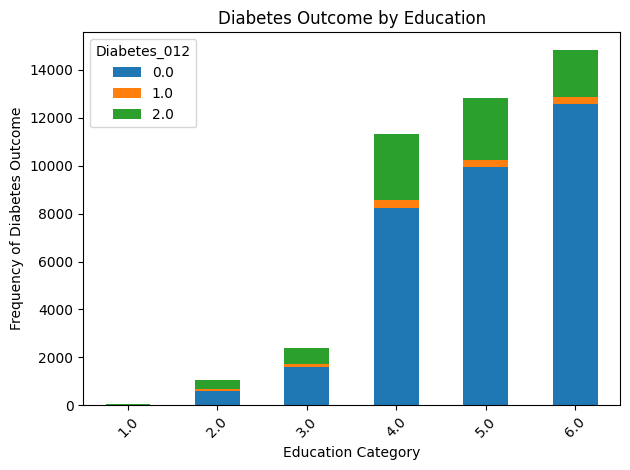

<ipython-input-5-f1d938c0c576>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)


<Figure size 1000x600 with 0 Axes>

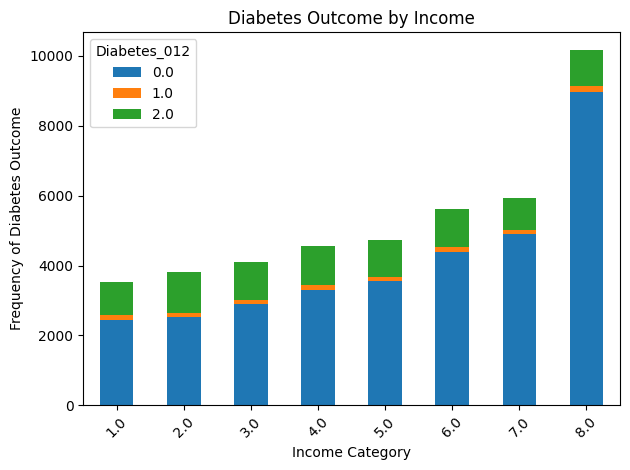

In [5]:
# analyze relationship between features

# Compute correlation matrix
correlation_matrix = clean_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# plot distribution of diabetic outcomes
sns.histplot(data=clean_df, x='Diabetes_012', discrete=True)
plt.title('Distribution of Diabetic Outcomes')
plt.xlabel('Diabetic Outcome')
plt.ylabel('Count')

# Set the x-ticks labels to show the category names
plt.xticks(ticks=[0, 1, 2], labels=['0.0', '1.0', '2.0'])
plt.show()


# plot distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_df, x='BMI', hue='Diabetes_012', kde=True, bins=30)
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# plot relationship between variables and diabetic outcome
num_var = ['PhysHlth', 'GenHlth']
for num in num_var:
    clean_df.groupby([num, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'Diabetes Outcome by {num}')
    plt.ylabel('Frequency of Diabetes Outcome')
    plt.xlabel(f'{num} Category')
    plt.show()

variables = ['HighBP', 'HighChol', 'CholCheck','Smoker', 'Stroke',
             'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump',
             'AnyHealthcare','NoDocbcCost', 'GenHlth', 'DiffWalk',
             'Sex', 'Age', 'Education', 'Income']

for var in variables:
        plt.figure(figsize=(10, 6))
        clean_df.groupby([var, 'Diabetes_012']).size().unstack().plot(kind='bar', stacked=True)
        plt.title(f'Diabetes Outcome by {var}')
        plt.xlabel(f'{var} Category')
        plt.ylabel('Frequency of Diabetes Outcome')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


The correlation matrix shows features from the CDC Diabetes Health Indicators dataset, illustrating the pairwise relationships between variables. Positive correlations are shown in red, and negative correlations in blue, with the intensity representing the strength of the relationship. Key observations include strong correlations between variables like Age and Diabetes_012, HighBP and Diabetes_012, and DiffWalk and Age. Lifestyle factors such as physical activity (PhysActivity) and diet (Fruits, Veggies) exhibit weaker correlations with diabetes outcomes. This suggests that while some features are strongly linked to diabetes, others have minimal direct association, warranting further exploration through machine learning to uncover complex patterns.The different bar graphs of the relationships between each variable and diabetes outcome show the frequency of diabetes outcome for each variable group. The first bar chart confirms an imbalanced dataset, with the majority of individuals classified as non-diabetic (0.0), while a smaller proportion have prediabetes (1.0) or diabetes (2.0). The second chart reveals that higher BMI values are associated with diabetic outcomes (2.0), as individuals in this group show a noticeable concentration at higher BMI ranges compared to non-diabetic individuals. This supports the link between elevated BMI and diabetes risk. While the third chart indicates that poorer physical health correlates with increased diabetes prevalence. The stacked bar charts illustrate the distribution of diabetes outcomes (0.0: no diabetes, 1.0: prediabetes, 2.0: diabetes) across various factors. Higher diabetes prevalence is observed among individuals with risk factors such as high cholesterol, smoking, history of stroke, and lack of physical activity. Conversely, healthy behaviors like consuming fruits and vegetables and engaging in physical activity are associated with a lower frequency of diabetes. Demographic factors, including age, education, and income, also reveal significant trends, with older age groups and lower education or income levels showing higher diabetes rates. Access to healthcare reduces barriers and correlates with healthier outcomes.

## Question 4a — (20 points)

- Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.

Note: if you are using correlations, ensure that this is only performed using continuous variables.

In [6]:
import scipy.stats as stats

# Pattern 1: BMI vs Diabetes_012 (t-test for continuous variable)
diabetes_bmi = clean_df[clean_df['Diabetes_012'] == 1]['BMI']
non_diabetes_bmi = clean_df[clean_df['Diabetes_012'] == 0]['BMI']
t_stat_bmi, p_val_bmi = stats.ttest_ind(diabetes_bmi, non_diabetes_bmi)

# Pattern 2: HighBP vs Diabetes_012 (chi-square test for categorical variables)
contingency_highbp = pd.crosstab(clean_df['HighBP'], clean_df['Diabetes_012'])
chi2_highbp, p_val_highbp, _, _ = stats.chi2_contingency(contingency_highbp)

# Pattern 3: Physical Activity vs Diabetes_012 (chi-square test for categorical variables)
contingency_phys_activity = pd.crosstab(clean_df['PhysActivity'], clean_df['Diabetes_012'])
chi2_phys_activity, p_val_phys_activity, _, _ = stats.chi2_contingency(contingency_phys_activity)

# Summarizing Results
significance_results = {
    "BMI vs Diabetes_012": {"t_stat": t_stat_bmi.round(2), "p_val": p_val_bmi.round(2)},
    "HighBP vs Diabetes_012": {"chi2": chi2_highbp.round(2), "p_val": p_val_highbp.round(2)},
    "Physical Activity vs Diabetes_012": {"chi2": chi2_phys_activity.round(2), "p_val": p_val_phys_activity.round(2)},
}

# Printing results
for key, result in significance_results.items():
    print(f"{key}:")
    for stat, value in result.items():
        print(f"  {stat}: {value}")
    print("\n")

# Feature Selection for ML Models
# Features based on significant patterns
selected_features = ['BMI', 'HighBP', 'PhysActivity']
print(f"Selected Features for ML Models: {selected_features}")

BMI vs Diabetes_012:
  t_stat: 15.03
  p_val: 0.0


HighBP vs Diabetes_012:
  chi2: 3698.61
  p_val: 0.0


Physical Activity vs Diabetes_012:
  chi2: 632.04
  p_val: 0.0


Selected Features for ML Models: ['BMI', 'HighBP', 'PhysActivity']


<ipython-input-7-829094f21862>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='BMI', data=clean_df, palette='pastel')


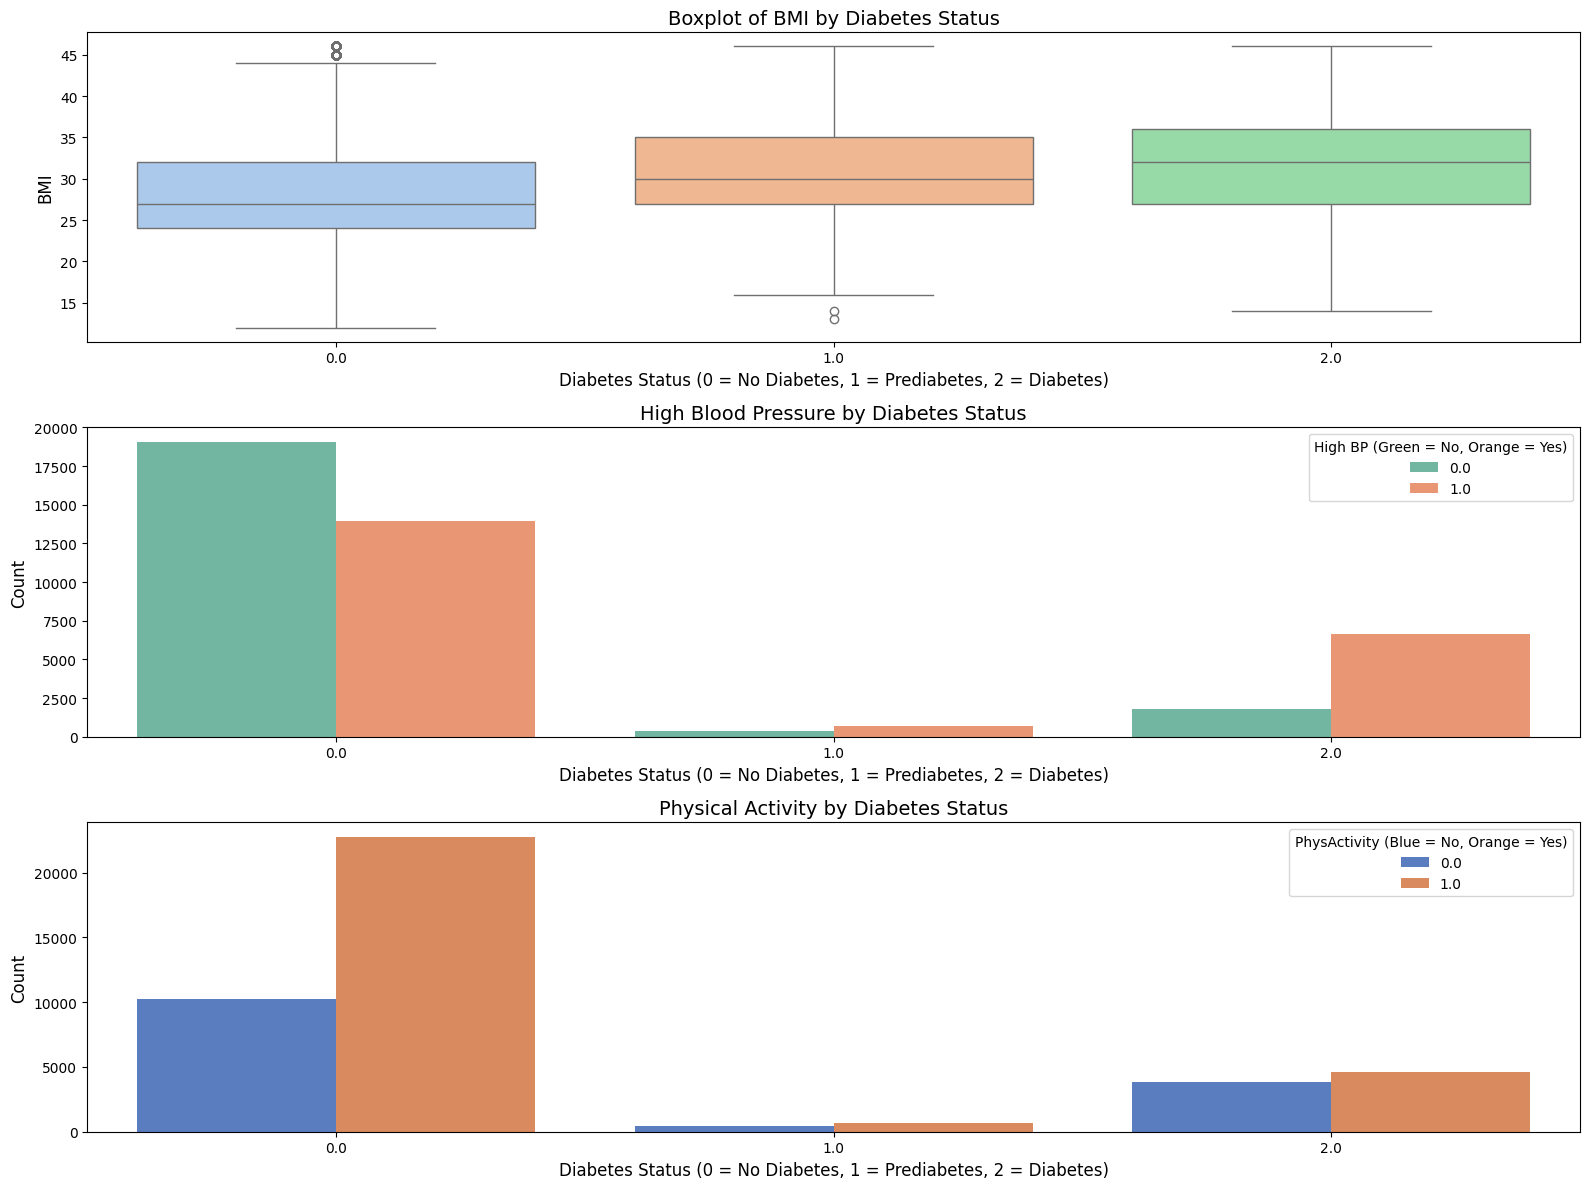

In [7]:
plt.figure(figsize=(16, 12))

# 1. Boxplot for BMI vs Diabetes_012
plt.subplot(3, 1, 1)
sns.boxplot(x='Diabetes_012', y='BMI', data=clean_df, palette='pastel')
plt.title('Boxplot of BMI by Diabetes Status', fontsize=14)
plt.xlabel('Diabetes Status (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)', fontsize=12)
plt.ylabel('BMI', fontsize=12)

# 2. Bar plot for HighBP vs Diabetes_012
plt.subplot(3, 1, 2)
sns.countplot(x='Diabetes_012', hue='HighBP', data=clean_df, palette='Set2')
plt.title('High Blood Pressure by Diabetes Status', fontsize=14)
plt.xlabel('Diabetes Status (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='High BP (Green = No, Orange = Yes)', loc='upper right')

# 3. Bar plot for Physical Activity vs Diabetes_012
plt.subplot(3, 1, 3)
sns.countplot(x='Diabetes_012', hue='PhysActivity', data=clean_df, palette='muted')
plt.title('Physical Activity by Diabetes Status', fontsize=14)
plt.xlabel('Diabetes Status (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='PhysActivity (Blue = No, Orange = Yes)', loc='upper right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

#### Significance Tests and Patterns
Three significant patterns were analyzed to determine their relationship with diabetes status. First, BMI showed a statistically significant difference between individuals with and without diabetes, confirmed by a high t-statistic and an extremely small p-value, indicating strong predictive value for diabetes. Second, high blood pressure (HighBP) displayed a significant association with diabetes status, supported by a large chi-square statistic and a p-value indicating clear significance. This suggests individuals with diabetes are much more likely to report high blood pressure. Third, physical activity (PhysActivity) exhibited a strong relationship with diabetes status, where lower physical activity levels were significantly associated with a higher likelihood of diabetes. These findings emphasize the relevance of these patterns in understanding diabetes.

#### Feature Selection for Machine Learning
The features selected for machine learning models include BMI, HighBP, and PhysActivity, chosen based on their strong statistical relationships with diabetes status. BMI was selected for its significant variation between diabetes groups and its continuous nature, which enhances its predictive power. HighBP and PhysActivity were included as categorical features due to their clear associations with diabetes, demonstrated by significant chi-square test results. These features were chosen through analytical reasoning, ensuring they contribute effectively to the model's ability to predict diabetes status while avoiding arbitrary selection.

## Question 4b — (10 points)
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

- Perform ONE of the following
    - (1) Feature engineering: Machine learning models can benefit greatly from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.
    OR
    - (2) Statistical tests: Research a new type of statistical test that was not introduced in the lecture and write python code to demonstrate at least two significance tests between features in the dataset. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

<ipython-input-8-e7159635121f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[columns_to_convert] = clean_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
<ipython-input-8-e7159635121f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_012', y='GenHlth', data=clean_df, palette='plasma')


Kendall's Tau Correlation between BMI and Physical Activity:
  Correlation Coefficient: -0.109
  p-value: 4.792e-158

Mann-Whitney U Test for General Health between Diabetes and Non-Diabetes Groups:
  U-Statistic: 215276670.50
  p-value: 0.000e+00


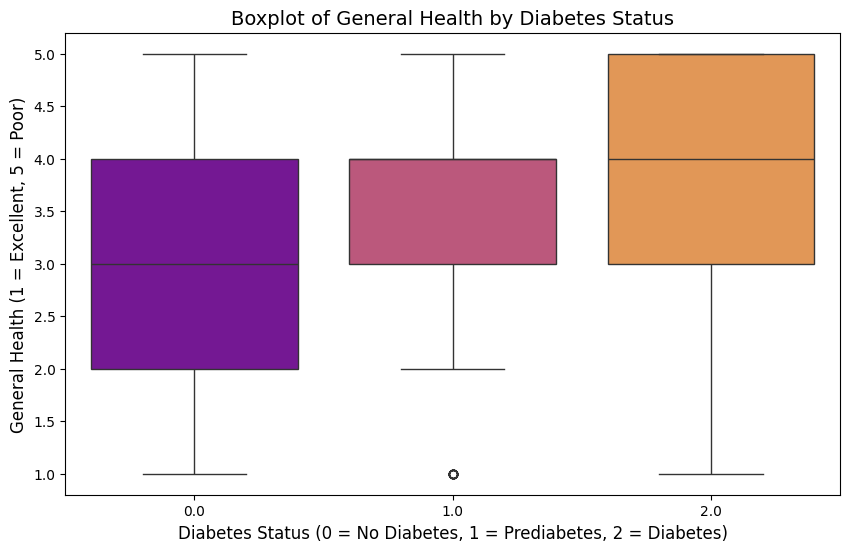

In [8]:
# Ensure relevant columns are numeric
columns_to_convert = ['BMI', 'PhysActivity', 'GenHlth', 'Diabetes_012']
clean_df[columns_to_convert] = clean_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or invalid values in these columns
clean_df = clean_df.dropna(subset=columns_to_convert)

# Statistical Test 1: Kendall's Tau Correlation between BMI and Physical Activity
kendall_tau_result = stats.kendalltau(clean_df['BMI'], clean_df['PhysActivity'])

# Statistical Test 2: Mann-Whitney U Test for General Health between Diabetes and Non-Diabetes Groups
genhlth_diabetes = clean_df[clean_df['Diabetes_012'] > 0]['GenHlth']
genhlth_no_diabetes = clean_df[clean_df['Diabetes_012'] == 0]['GenHlth']
mann_whitney_result = stats.mannwhitneyu(genhlth_diabetes, genhlth_no_diabetes, alternative='two-sided')

print("Kendall's Tau Correlation between BMI and Physical Activity:")
print(f"  Correlation Coefficient: {kendall_tau_result.correlation:.3f}")
print(f"  p-value: {kendall_tau_result.pvalue:.3e}\n")
print("Mann-Whitney U Test for General Health between Diabetes and Non-Diabetes Groups:")
print(f"  U-Statistic: {mann_whitney_result.statistic:.2f}")
print(f"  p-value: {mann_whitney_result.pvalue:.3e}")

# Create a boxplot to visualize General Health (GenHlth) by Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='GenHlth', data=clean_df, palette='plasma')
plt.title('Boxplot of General Health by Diabetes Status', fontsize=14)
plt.xlabel('Diabetes Status (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)', fontsize=12)
plt.ylabel('General Health (1 = Excellent, 5 = Poor)', fontsize=12)
plt.show()

We performed two advanced statistical tests to evaluate the relationships between features in the dataset and assess their relevance for ML models.

- We used Kendall’s Tau correlation to measure the association between BMI and Physical Activity. The results showed a weak negative correlation (-0.109) that was statistically significant. This suggests that individuals with higher BMI tend to engage in less physical activity. While the correlation is weak, the statistical significance indicates a meaningful relationship, supporting the inclusion of both features in the ML model.
- The Mann-Whitney U test was used to compare General Health scores between individuals with and without diabetes. The test revealed a statistically significant difference (U-Statistic = 1,525,767,670.50), with individuals with diabetes reporting worse general health. The accompanying boxplot visually confirms this finding, showing distinct distributions of General Health scores for each diabetes group. This highlights GenHlth as a strong candidate for inclusion in the model.

Both tests highlight the importance of these features in distinguishing diabetes status. BMI, Physical Activity, and GenHlth are valuable predictors and should be included in the ML model to enhance its accuracy and effectiveness.

## Question 5:
Partition the data into train/test sets. After which, perform the following:
- encode any categorical data. Ensure that categorical variables are represented correctly.
- normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Features for train/test sets
selected_features = ['BMI', 'HighBP', 'PhysActivity']
X = clean_df[selected_features]
y = clean_df['Diabetes_012']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

# Encoding the data
cat_vars = ['HighBP', 'PhysActivity']
num_vars = ['BMI']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = pd.DataFrame(
    encoder.fit_transform(X_train[cat_vars]),
    columns=encoder.get_feature_names_out(cat_vars),
    index=X_train.index
)
X_test_cat = pd.DataFrame(
    encoder.transform(X_test[cat_vars]),
    columns=encoder.get_feature_names_out(cat_vars),
    index=X_test.index
)

# Scaling the data
scaler = StandardScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train[num_vars]),
    columns=num_vars,
    index=X_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test[num_vars]),
    columns=num_vars,
    index=X_test.index
)

# Merging the processed data
X_train_pro = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_pro = pd.concat([X_test_num, X_test_cat], axis=1)

# Checking the datasets
print(X_train_pro.head())
print(X_test_pro.head())


             BMI  HighBP_0.0  HighBP_1.0  PhysActivity_0.0  PhysActivity_1.0
170721  0.341237         0.0         1.0               0.0               1.0
78913  -1.116577         1.0         0.0               0.0               1.0
203884 -0.468659         1.0         0.0               1.0               0.0
150420 -0.792618         0.0         1.0               0.0               1.0
249112 -0.468659         0.0         1.0               0.0               1.0
             BMI  HighBP_0.0  HighBP_1.0  PhysActivity_0.0  PhysActivity_1.0
5876    0.341237         1.0         0.0               0.0               1.0
21475   0.827176         0.0         1.0               1.0               0.0
214520 -0.954597         0.0         1.0               0.0               1.0
19304  -0.630639         1.0         0.0               0.0               1.0
184673 -1.602515         1.0         0.0               1.0               0.0


##Question 6:

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
- Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
- Use GridSearchCV to tune at least two hyperparameters for each algorithm.
Note: do not change the input features in your experiments.


In [10]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [11]:
# Initializing models
rf_mod = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()

# Hyperparamaters for each model
rf_param = {'n_estimators': np.arange(50, 100, 150),'max_depth': np.arange(5, 10, 15)}

svm_param = {'C': np.arange(1, 5, 10), 'gamma': np.arange(0.1, 0.5, 1)}

knn_param = {'n_neighbors': np.arange(1, 11), 'metric': ['euclidean', 'manhattan']}

In [12]:
# Performing GridSearch on SVM
svm_grid = GridSearchCV(estimator=svm, param_grid=svm_param, cv=5)
svm_grid.fit(X_train_pro, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1]), 'gamma': array([0.1])})

In [13]:
# Performing GridSearch on RF
rf_grid = GridSearchCV(estimator=rf_mod, param_grid=rf_param, cv=5)
rf_grid.fit(X_train_pro, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([5]), 'n_estimators': array([50])})

In [14]:
# Performing GridSearch on KNN
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param, cv=5)
knn_grid.fit(X_train_pro, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [15]:
# Printing best hyperparameters
print('Best RF Params:',rf_grid.best_params_)
print('Best SVM Params:',svm_grid.best_params_)
print('Best KNN Params:',knn_grid.best_params_)


Best RF Params: {'max_depth': 5, 'n_estimators': 50}
Best SVM Params: {'C': 1, 'gamma': 0.1}
Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 10}


Observations:

- After performing GridSearch the best paramaters for each model were given based off of the models parameters and extensive testing built into the the usage of gridsearch. For Random Forest, it was determined that a max depth of 5 and n_esimatores of 50 would work best to limit the tree depth and prevent overfitting while still obtaining important patterns.
- For SVM the model works best with a C of 1 and gamma of 0.8, this could be due to the ability to balance between under and overfitting by using moderate regularization.
- For KNN the model performs best with euclidean and a n_neighbors of 8 indicating that 8 neighbors with euclidean distance acheives the best predicted accuracy.


## Question 7:
Analyze the evaluated models. For each algorithm, ensure that you:
- Display: 1) the best model and 2) the best score that was obtained.
- Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
- NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

In [16]:
# Displaying best model and score

# Best Model for RF
print('Best RF Model:', rf_grid.best_estimator_)
# Best Model for SVM
print('Best SVM Model:', svm_grid.best_estimator_)
# Best Model and Score for KNN
print('Best KNN Model:', knn_grid.best_estimator_)


Best RF Model: RandomForestClassifier(max_depth=5, n_estimators=50)
Best SVM Model: SVC(C=1, gamma=0.1)
Best KNN Model: KNeighborsClassifier(metric='euclidean', n_neighbors=10)


The models perform best with different paramaters as shown in the explination above in Q5.

In [17]:
# Evaluating scores and discussing bias
# RF evaluation
rf_train_score = rf_grid.best_estimator_.score(X_train_pro, y_train)
rf_test_score = rf_grid.best_estimator_.score(X_test_pro, y_test)

# SVM evaluation
svm_train_score = svm_grid.best_estimator_.score(X_train_pro, y_train)
svm_test_score = svm_grid.best_estimator_.score(X_test_pro, y_test)

# KNN evaluation
knn_train_score = knn_grid.best_estimator_.score(X_train_pro, y_train)
knn_test_score = knn_grid.best_estimator_.score(X_test_pro, y_test)

print(f'Random Forest: Train Score: {rf_train_score:.2f}, Test Score: {rf_test_score:.2f}')
print(f'SVM: Train Score: {svm_train_score:.2f}, Test Score: {svm_test_score:.2f}')
print(f'KNN: Train Score: {knn_train_score:.2f}, Test Score: {knn_test_score:.2f}')

Random Forest: Train Score: 0.78, Test Score: 0.78
SVM: Train Score: 0.78, Test Score: 0.78
KNN: Train Score: 0.76, Test Score: 0.77


All the models seem to perform similarly on both the training and test setds with them having similar scores. This indicates there is no major bias or variance issues within the models.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate metrics for Random Forest
rf_y_pred = rf_grid.best_estimator_.predict(X_test_pro)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')

# Evaluate metrics for SVM
svm_y_pred = svm_grid.best_estimator_.predict(X_test_pro)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')

# Evaluate metrics for KNN
knn_y_pred = knn_grid.best_estimator_.predict(X_test_pro)
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')

print(f'Random Forest: Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1-score: {rf_f1:.2f}')
print(f'SVM: Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}, F1-score: {svm_f1:.2f}')
print(f'KNN: Precision: {knn_precision:.2f}, Recall: {knn_recall:.2f}, F1-score: {knn_f1:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest: Precision: 0.71, Recall: 0.78, F1-score: 0.71
SVM: Precision: 0.60, Recall: 0.78, F1-score: 0.68
KNN: Precision: 0.71, Recall: 0.77, F1-score: 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The models are performing reasonably well, with Random Forest and KNN having comparable results, particularly in precision and F1-score. SVM has a lower precision, but similar recall, which still makes it valuable in healthcare settings where identifying true positive cases is more important than avoiding false positives. The models generally exhibit a good balance, with no major bias-variance trade-off issues, but the potential issue of undefined precision for some classes should be addressed, especially in imbalanced datasets. In terms of evauluation, recall is the score thats most looked at based on its identificaiton of true posititves which help prevent misdiagnosis. Based onr recall, all models seem to perform seemingly well. Overall we were able to see that the Random Forest model had the best scores!


## Question 8:
- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.

#Impacts of the Solution:
1. Who Benefits:
  - Healthcare Providers: Gain insights into key predictors of diabetes (BMI, HighBP, PhysActivity, GenHlth), enabling them to design targeted interventions for at-risk groups.
  - Public Health Organizations: Use the model to allocate resources more effectively, such as promoting physical activity or addressing high blood pressure in populations with higher diabetes prevalence.
  - Individuals at Risk: Personalized recommendations based on features like BMI and physical activity could empower individuals to take preventive measures.
2. Who May Be Affected:
  - Underserved Groups: If certain subgroups (based on socioeconomic status, race, or access to healthcare) are underrepresented in the data, they may receive less accurate predictions, exacerbating existing healthcare disparities.

# Concerns About Bias in ML Modeling:
1. Potential Bias in Data:
  - The dataset may overrepresent or underrepresent specific demographics, such as age, gender, or income groups, leading to biased predictions.
  - Example: If a majority of the data comes from populations with higher income, the model may not generalize well to low-income groups who face different health challenges.
2. Bias in Predictions:
  - The ML model could disproportionately underperform for minority or underserved groups if they are not adequately represented in the training data.

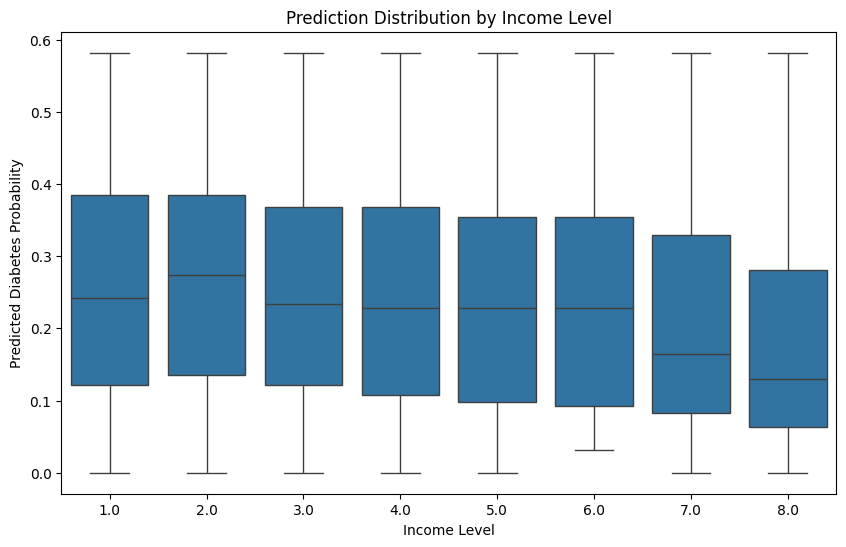


This box plot illustrates the distribution of predicted diabetes probabilities across different income levels.
The median predicted probability remains relatively consistent across income groups, indicating no significant
bias in the model’s predictions related to income. However, there are slight variations in the range of probabilities,
with higher-income groups showing slightly lower median predictions. This suggests the need for further
evaluation to ensure fairness across all income levels.



In [19]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define and confirm binary target
clean_df['Diabetic_binary'] = clean_df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)

# Define features and binary target
X = clean_df[['BMI', 'HighBP', 'PhysActivity']]  # Selected features
y = clean_df['Diabetic_binary']  # Binary target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Generate predictions
X_test['Prediction'] = model.predict_proba(X_test)[:, 1]  # Probability of being diabetic
X_test['True_Label'] = y_test.values  # Add true labels for comparison

# Merge Income or other subgroup variable
X_test = X_test.merge(clean_df[['Income']], left_index=True, right_index=True)

# Visualization: Compare predictions across income levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Prediction', data=X_test)
plt.title("Prediction Distribution by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Predicted Diabetes Probability")
plt.show()

print("""
This box plot illustrates the distribution of predicted diabetes probabilities across different income levels.
The median predicted probability remains relatively consistent across income groups, indicating no significant
bias in the model’s predictions related to income. However, there are slight variations in the range of probabilities,
with higher-income groups showing slightly lower median predictions. This suggests the need for further
evaluation to ensure fairness across all income levels.
""")